# ABEL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *

### Define the input beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 0e-6 # [m]
driver.emit_nx, driver.emit_ny = 20e-6, 20e-6 # [m rad]
driver.beta_x, driver.beta_y = 10e-3, 10e-3 # [m]
driver.num_particles = 500000
driver.symmetrize = True

# define witness bunch
witness = SourceBasic()
witness.charge = -0.5e-9 # [C]
witness.energy = 100e6 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 5e-6 # [m]
witness.z_offset = -135e-6 # [m]
witness.emit_nx, witness.emit_ny = 10e-6, 10e-6 # [m rad]
witness.beta_x, witness.beta_y = 10e-3, 10e-3 # [m]
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 10e-6, 0e-6 # [m]

# define rf linac
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = driver.energy - witness.energy
rf_accelerator.length = 1000 # [m]

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = witness.beta_x # [m]
bds.beta_y = witness.beta_y # [m]

# define overall linac
linac = ConventionalLinac()
linac.source = witness
linac.rf_accelerator = rf_accelerator
linac.bds = bds

### Define the experimental setup

In [3]:
# define stage
stage = StageQuasistatic2d()
#stage = StageHipace()
stage.driver_source = driver
stage.length = 0.05 # [m]
stage.nom_accel_gradient = 15e9 # [V/m]
stage.plasma_density = 4e22 # [m^-3]
stage.ion_motion = True
stage.ion_species = 'He'
stage.beam_ionization = False

# define experiment
experiment = ExperimentPWFA()
experiment.linac = linac
experiment.stage = stage

### Perform linac tracking

In [4]:
# perform experiment tracking
experiment.stage.num_nodes = 16
beam = experiment.run('experiment_example', num_shots=1, overwrite=False)

>> SHOT 1 already exists and will not be overwritten.


### Plot the wakefield

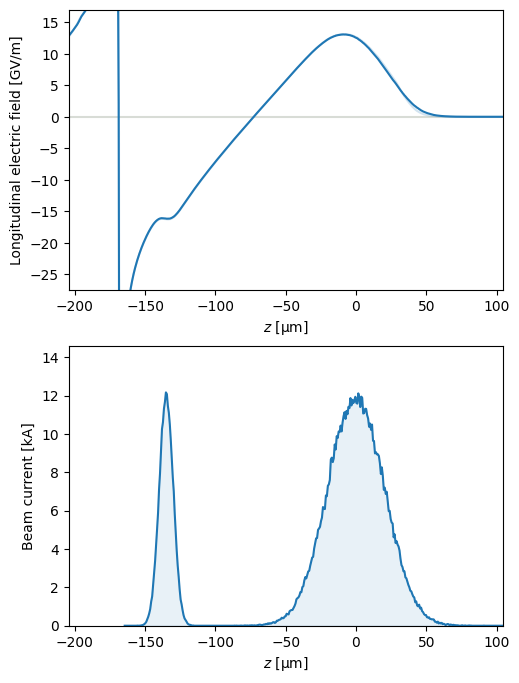

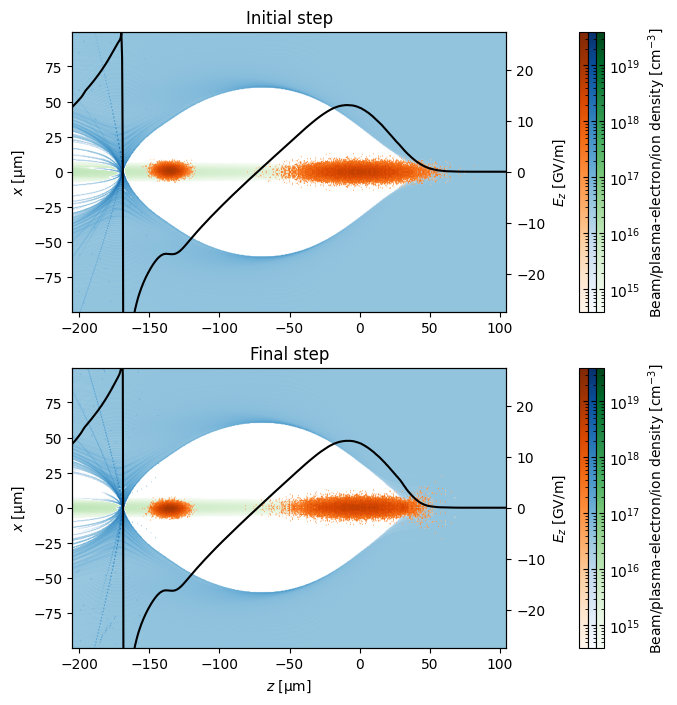

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()
experiment.stage.plot_wake()

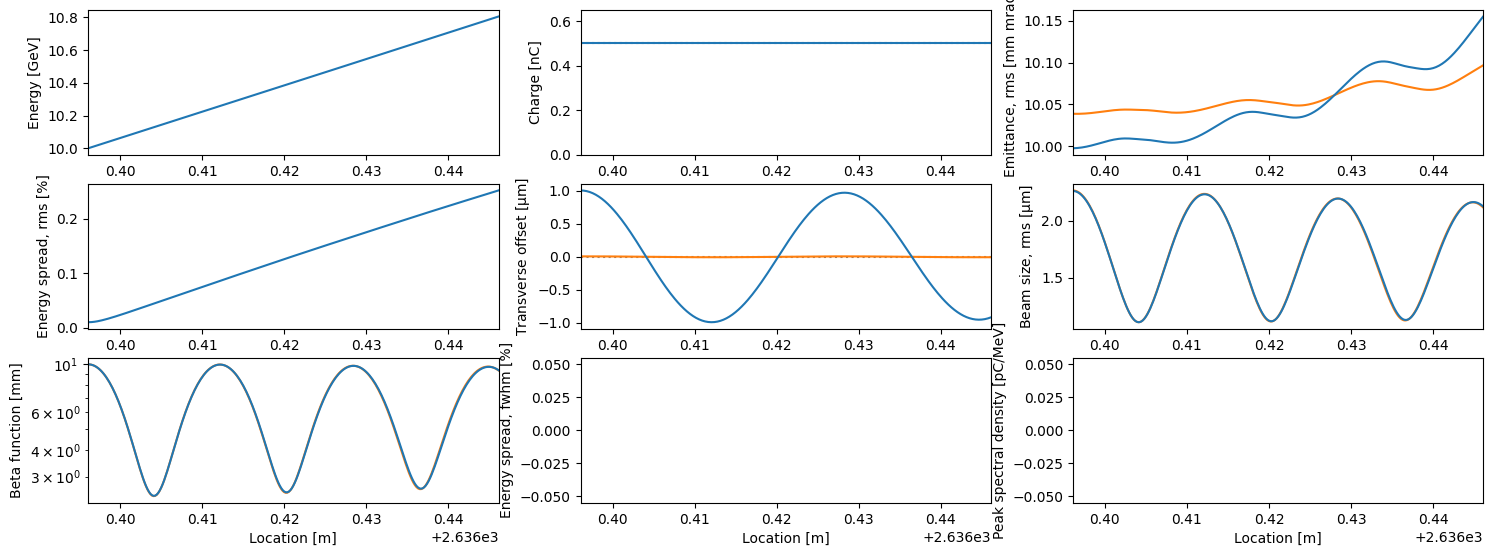

In [6]:
experiment.stage.plot_evolution()

### Plot longitudinal phase space

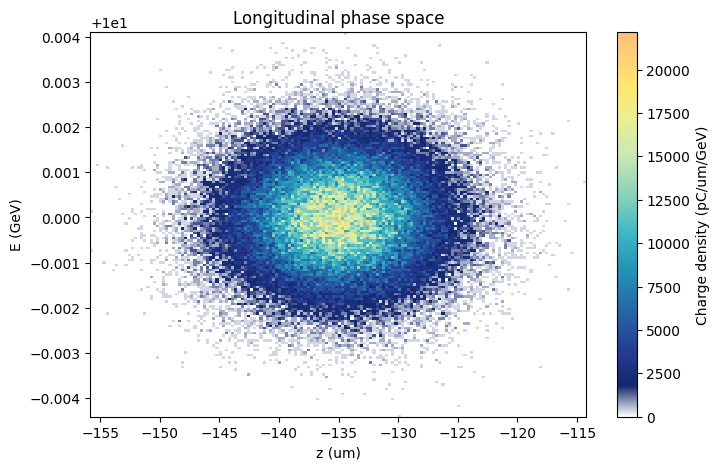

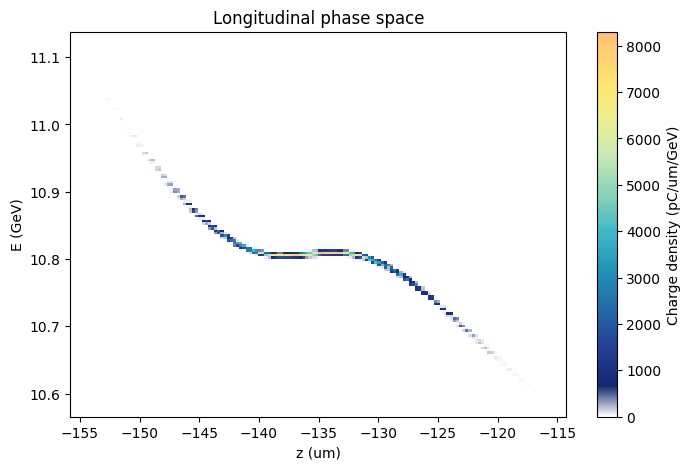

In [7]:
# plot the longitudinal phase space (before and after the PWFA)
experiment.get_beam(index=-2).plot_lps()
experiment.get_beam(index=-1).plot_lps()